In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import tree,svm
from sklearn.ensemble import RandomForestClassifier
import pickle

In [2]:
df = pd.read_csv('mldata.csv')
df.head()

,Logical quotient rating,hackathons,coding skills rating,public speaking points,self-learning capability?,Extra-courses did,certifications,reading and writing skills,memory capability score,Interested subjects,interested career area,Type of company want to settle in?,Taken inputs from seniors or elders,Management or Technical,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,5,0,6,2,yes,no,information security,poor,poor,programming,testing,BPA,no,Management,smart worker,yes,no,Applications Developer
1,7,6,4,3,no,yes,shell programming,excellent,medium,Management,system developer,Cloud Services,yes,Technical,hard worker,no,yes,Applications Developer
2,2,3,9,1,no,yes,information security,excellent,poor,data engineering,Business process analyst,product development,yes,Technical,smart worker,no,no,Applications Developer
3,2,6,3,5,no,yes,r programming,excellent,poor,networks,testing,Testing and Maintainance Services,yes,Management,smart worker,yes,yes,Applications Developer
4,2,0,3,4,yes,no,distro making,excellent,medium,Software Engineering,system developer,BPA,no,Technical,hard worker,yes,no,Applications Developer


In [3]:
print('The shape of our training set: %s professionals and %s features'%(df.shape[0],df.shape[1]))

The shape of our training set: 6901 professionals and 18 features


Data Preprocessing

In [4]:
print("Columns in our dataset: " , df.columns)

Columns in our dataset:  Index(['Logical quotient rating', 'hackathons', 'coding skills rating',
       'public speaking points', 'self-learning capability?',
       'Extra-courses did', 'certifications', 'reading and writing skills',
       'memory capability score', 'Interested subjects',
       'interested career area ', 'Type of company want to settle in?',
       'Taken inputs from seniors or elders', 'Management or Technical',
       'hard/smart worker', 'worked in teams ever?', 'Introvert',
       'Suggested Job Role'],
      dtype='object')


In [5]:
print("List of Numerical features: \n" , df.select_dtypes(include=np.number).columns.tolist())
print("\n\nList of Categorical features: \n" , df.select_dtypes(include=['object']).columns.tolist())

List of Numerical features: 
 ['Logical quotient rating', 'hackathons', 'coding skills rating', 'public speaking points']


List of Categorical features: 
 ['self-learning capability?', 'Extra-courses did', 'certifications', 'reading and writing skills', 'memory capability score', 'Interested subjects', 'interested career area ', 'Type of company want to settle in?', 'Taken inputs from seniors or elders', 'Management or Technical', 'hard/smart worker', 'worked in teams ever?', 'Introvert', 'Suggested Job Role']


Checking Missing Values

In [6]:
df.isnull().sum(axis=0)

Logical quotient rating                0
hackathons                             0
coding skills rating                   0
public speaking points                 0
self-learning capability?              0
Extra-courses did                      0
certifications                         0
reading and writing skills             0
memory capability score                0
Interested subjects                    0
interested career area                 0
Type of company want to settle in?     0
Taken inputs from seniors or elders    0
Management or Technical                0
hard/smart worker                      0
worked in teams ever?                  0
Introvert                              0
Suggested Job Role                     0
dtype: int64

**Observation: No missing values.**

Distinct Values for Categorical Features

In [7]:
categorical_col = df[['self-learning capability?', 'Extra-courses did','reading and writing skills', 'memory capability score', 
                      'Taken inputs from seniors or elders', 'Management or Technical', 'hard/smart worker', 'worked in teams ever?', 
                      'Introvert', 'interested career area ']]
for i in categorical_col:
    print(df[i].value_counts(), end="\n\n")

yes    3496
no     3405
Name: self-learning capability?, dtype: int64

no     3529
yes    3372
Name: Extra-courses did, dtype: int64

excellent    2328
medium       2315
poor         2258
Name: reading and writing skills, dtype: int64

medium       2317
excellent    2303
poor         2281
Name: memory capability score, dtype: int64

yes    3501
no     3400
Name: Taken inputs from seniors or elders, dtype: int64

Management    3461
Technical     3440
Name: Management or Technical, dtype: int64

smart worker    3523
hard worker     3378
Name: hard/smart worker, dtype: int64

no     3470
yes    3431
Name: worked in teams ever?, dtype: int64

yes    3544
no     3357
Name: Introvert, dtype: int64

system developer            1178
security                    1177
Business process analyst    1154
developer                   1145
testing                     1128
cloud computing             1119
Name: interested career area , dtype: int64



Data Balancing for Classification

<AxesSubplot:xlabel='Suggested Job Role', ylabel='count'>

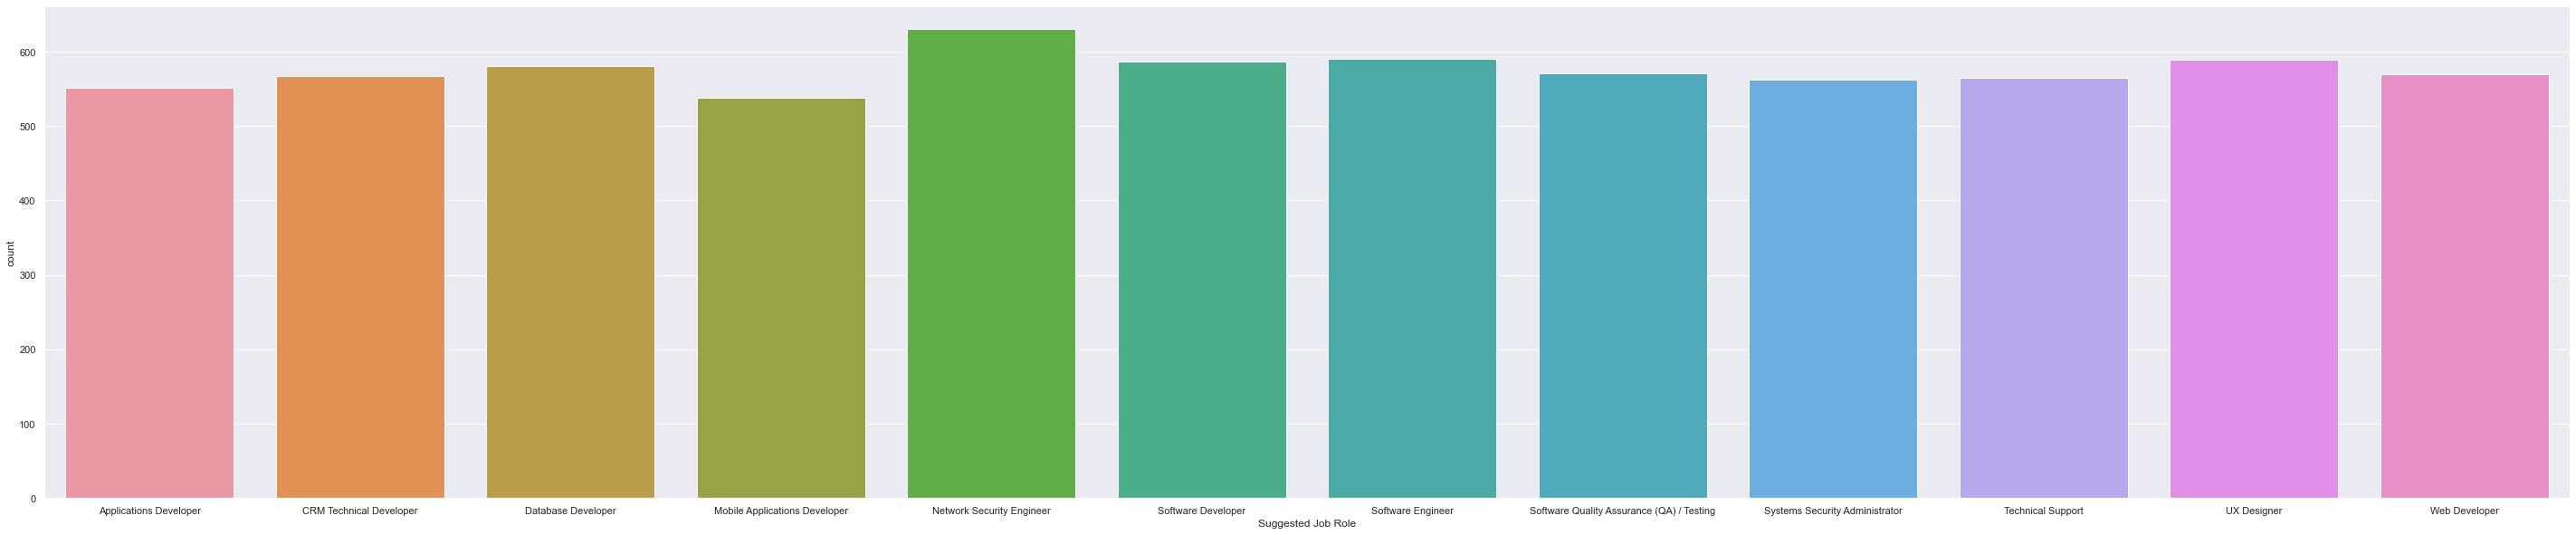

In [8]:
sns.set(rc={'figure.figsize':(50,10)})
sns.countplot(x = df["Suggested Job Role"])

Correlation Between Numerical Features

<AxesSubplot:>

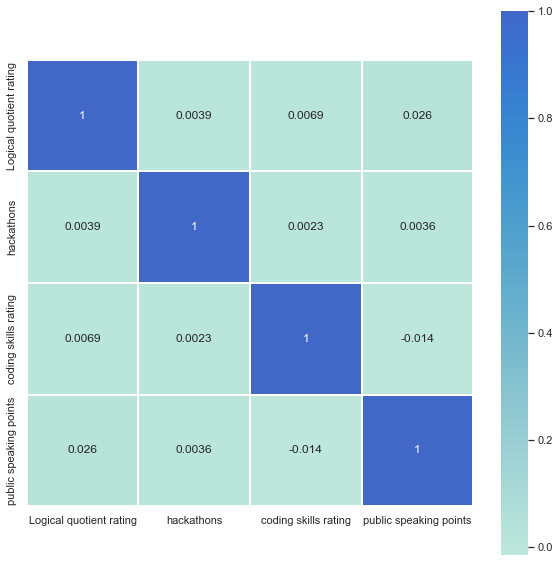

In [9]:
corr = df[['Logical quotient rating', 'hackathons', 
           'coding skills rating', 'public speaking points']].corr()
f,axes = plt.subplots(1,1,figsize = (10,10))
sns.heatmap(corr,square=True,annot = True,linewidth = .4,center = 2,ax = axes)

No highly corelated numerical pair found

Visualization for Categorical Variables

In [10]:
print(df["Interested subjects"].value_counts())

Software Engineering      731
IOT                       722
cloud computing domain    721
programming               716
networks                  713
Computer Architecture     703
data engineering          672
hacking                   663
Management                644
parallel computing        616
Name: Interested subjects, dtype: int64


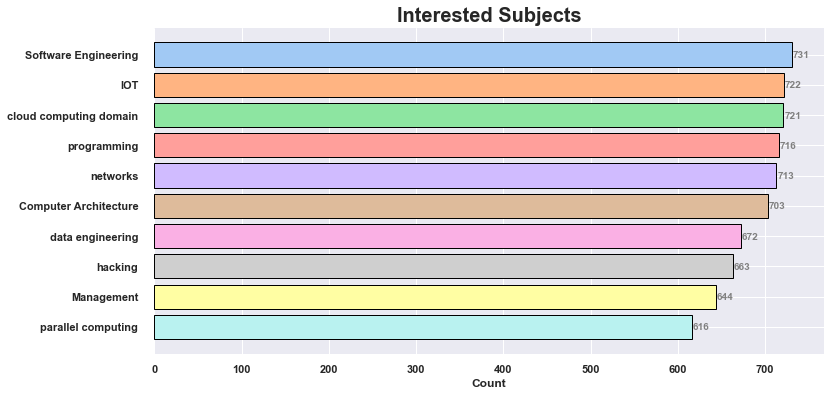

In [11]:
# Figure Size
fig, ax = plt.subplots(figsize=(12,6))

# Horizontal Bar Plot
title_cnt=df["Interested subjects"].value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1],edgecolor='black', color=sns.color_palette('pastel',len(title_cnt)))




# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)


# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Interested Subjects',weight='bold',fontsize=20)
ax.set_xlabel('Count', weight='bold')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')

# Show Plot
plt.show()

In [12]:
print(df["certifications"].value_counts())

r programming           803
information security    785
shell programming       783
machine learning        783
full stack              768
hadoop                  764
python                  756
distro making           740
app development         719
Name: certifications, dtype: int64


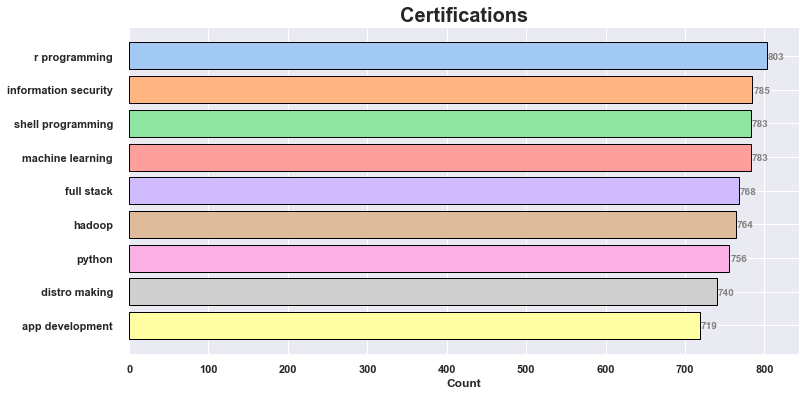

In [13]:
# Figure Size
fig, ax = plt.subplots(figsize=(12,6))

# Horizontal Bar Plot
title_cnt=df.certifications.value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1],edgecolor='black', color=sns.color_palette('pastel',len(title_cnt)))



# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)


# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Certifications',weight='bold',fontsize=20)
ax.set_xlabel('Count', weight='bold')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')

# Show Plot
plt.show()

In [14]:
print(df["Type of company want to settle in?"].value_counts())

Service Based                        725
Web Services                         719
BPA                                  711
Testing and Maintainance Services    698
Product based                        695
Finance                              694
Cloud Services                       692
product development                  669
Sales and Marketing                  658
SAaS services                        640
Name: Type of company want to settle in?, dtype: int64


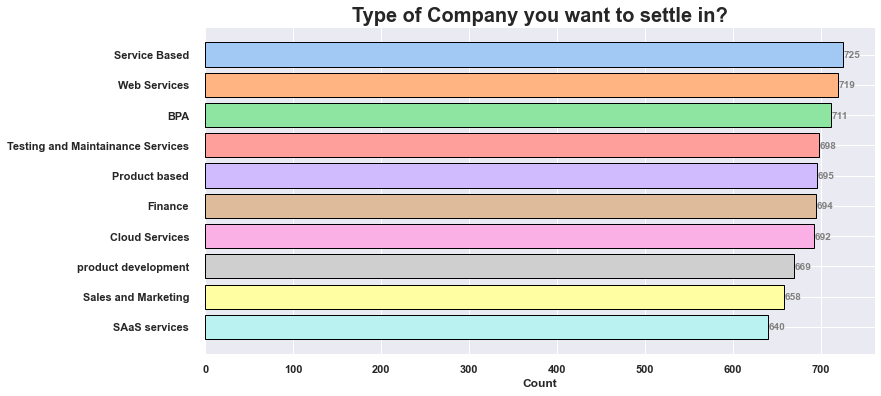

In [15]:
# Figure Size
fig, ax = plt.subplots(figsize=(12,6))

# Horizontal Bar Plot
title_cnt=df["Type of company want to settle in?"].value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1],edgecolor='black', color=sns.color_palette('pastel',len(title_cnt)))



# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)


# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Type of Company you want to settle in?',weight='bold',fontsize=20)
ax.set_xlabel('Count', weight='bold')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')

# Show Plot
plt.show()

In [16]:
print(df["interested career area "].value_counts())

system developer            1178
security                    1177
Business process analyst    1154
developer                   1145
testing                     1128
cloud computing             1119
Name: interested career area , dtype: int64


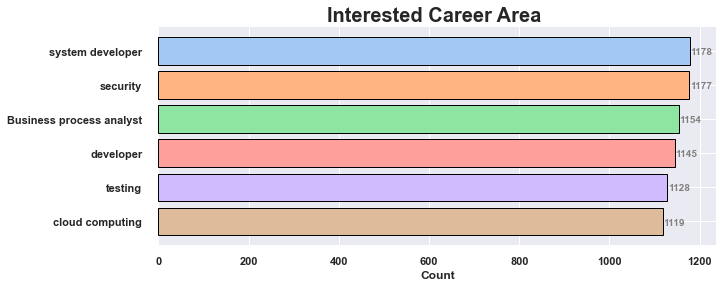

In [17]:
# Figure Size
fig, ax = plt.subplots(figsize=(10,4)) #width,height

# Horizontal Bar Plot
title_cnt=df["interested career area "].value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1],edgecolor='black', color=sns.color_palette('pastel',len(title_cnt)))



# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)


# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Interested Career Area ',weight='bold',fontsize=20)
ax.set_xlabel('Count', weight='bold')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')

# Show Plot
plt.show()

Binary Encoding for Categorical Variables

In [18]:
cols = df[["self-learning capability?", "Extra-courses did","Taken inputs from seniors or elders", "worked in teams ever?", "Introvert","Management or Technical","hard/smart worker"]]
for i in cols:
    cleanup_nums = {i: {"yes": 1, "no": 0, "smart worker": 1, "hard worker": 0, "Management": 1, "Technical": 0}}

    df = df.replace(cleanup_nums)

Number Encoding for Categorical 

In [19]:
mycol = df[['reading and writing skills', 'memory capability score', 'certifications', 'Management or Technical',
            'hard/smart worker', 'Type of company want to settle in?', 'Interested subjects', 'interested career area ']]
for i in mycol:
    cleanup_nums = {i: {"poor": 0, "medium": 1, "excellent": 2, "r programming": 1, "information security": 2,
                        "shell programming": 3, "machine learning": 4, "full stack": 5, "hadoop": 6, "python": 7, 
                        "distro making": 8, "app development": 9, "Service Based": 1, "Web Services": 2,
                        "BPA": 3, "Testing and Maintainance Services": 4, "Product based": 5, "Finance": 6, "Cloud Services": 7, 
                        "product development": 8, "Sales and Marketing": 9, "SAaS services": 10, "system developer": 1, "security": 2,
                        "Business process analyst": 3, "developer": 4, "testing": 5, "cloud computing": 6,
                        "Software Engineering": 1, "IOT": 2, "cloud computing domain": 3, "programming": 4, "networks": 5, "Computer Architecture": 6, "data engineering": 7, 
                        "hacking": 8, "Management": 9, "parallel computing": 10}}
    df = df.replace(cleanup_nums)


print("\n\nList of Categorical features: \n" , df.select_dtypes(include=['object']).columns.tolist())



List of Categorical features: 
 ['Suggested Job Role']


Dummy Variable Encoding

In [20]:
df.head()

,Logical quotient rating,hackathons,coding skills rating,public speaking points,self-learning capability?,Extra-courses did,certifications,reading and writing skills,memory capability score,Interested subjects,interested career area,Type of company want to settle in?,Taken inputs from seniors or elders,Management or Technical,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,5,0,6,2,1,0,2,0,0,4,5,3,0,1,1,1,0,Applications Developer
1,7,6,4,3,0,1,3,2,1,9,1,7,1,0,0,0,1,Applications Developer
2,2,3,9,1,0,1,2,2,0,7,3,8,1,0,1,0,0,Applications Developer
3,2,6,3,5,0,1,1,2,0,5,5,4,1,1,1,1,1,Applications Developer
4,2,0,3,4,1,0,8,2,1,1,1,3,0,0,0,1,0,Applications Developer


In [21]:
print("List of Numerical features: \n" , df.select_dtypes(include=np.number).columns.tolist())

List of Numerical features: 
 ['Logical quotient rating', 'hackathons', 'coding skills rating', 'public speaking points', 'self-learning capability?', 'Extra-courses did', 'certifications', 'reading and writing skills', 'memory capability score', 'Interested subjects', 'interested career area ', 'Type of company want to settle in?', 'Taken inputs from seniors or elders', 'Management or Technical', 'hard/smart worker', 'worked in teams ever?', 'Introvert']


Building Machine Learning Model

In [22]:
feed = df[['Logical quotient rating', 'hackathons', 'coding skills rating',
       'public speaking points', 'self-learning capability?',
       'Extra-courses did', 'certifications', 'reading and writing skills',
       'memory capability score', 'Interested subjects',
       'interested career area ', 'Type of company want to settle in?',
       'Taken inputs from seniors or elders', 'Management or Technical',
       'hard/smart worker', 'worked in teams ever?', 'Introvert',
             'Suggested Job Role']]

# Taking all independent variable columns
df_train_x = feed.drop('Suggested Job Role',axis = 1)

# Target variable column
df_train_y = feed['Suggested Job Role']

x_train, x_test, y_train, y_test = train_test_split(df_train_x, df_train_y, test_size=0.40, random_state=62)


Decision Tree Classifier

In [23]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)




y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)

print("accuracy=",accuracy*100)

accuracy= 8.909815284317277


Predicting class

In [24]:
userdata = [['5','0','6','2','1','0','2','0','0','4','5','3','0','1','1','1','0']]
ynewclass = clf.predict(userdata)
ynew = clf.predict_proba(userdata)
print(ynewclass)
print("Probabilities of all classes: ", ynew)
print("Probability of Predicted class : ", np.max(ynew))

['Applications Developer']
Probabilities of all classes:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Probability of Predicted class :  1.0


C:\Users\mahad\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\mahad\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [25]:
pickle.dump(clf,open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))